<a href="https://colab.research.google.com/github/govind527/Pytorch_Practice/blob/main/Pytorch_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import sklearn

In [2]:
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [5]:
##make dataframe
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


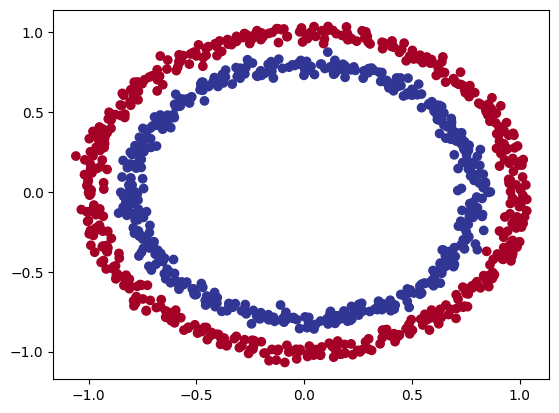

In [6]:
##visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [7]:
## check input and output shapes
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [10]:
## view first sample
X_sample=X[0]
y_sample=y[0]
print(f"Sample input of X: {X_sample} and sample output of y: {y_sample}")
print(f"type of X: {type(X_sample)} and type of y: {type(y_sample)}")
print(f"shape of X: {X_sample.shape} and shape of y: {y_sample.shape}")

Sample input of X: [0.75424625 0.23148074] and sample output of y: 1
type of X: <class 'numpy.ndarray'> and type of y: <class 'numpy.int64'>
shape of X: (2,) and shape of y: ()


In [11]:
##turn data into tensor and splitting
import torch
torch.__version__

'2.6.0+cu124'

In [12]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [13]:
X

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [14]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [15]:
## split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)


In [16]:
len(X_train),len(y_train)

(800, 800)

In [17]:
len(X_test),len(y_test)

(200, 200)

In [18]:
## Building a model
import torch
from torch import nn

device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [19]:
## subclass nn.Module and create a model

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=5)
        self.layer_2=nn.Linear(in_features=5,out_features=1)
    def forward(self,x):
        return self.layer_2(self.layer_1(x))

model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
device

'cuda'

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
## model replicate using nn.Sequencial

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
## make predictions
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5940,  0.1649],
                      [-0.4651,  0.2846],
                      [ 0.4967,  0.1009],
                      [ 0.1369, -0.5506],
                      [ 0.2481, -0.0898]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5951,  0.5148,  0.1749, -0.5766,  0.1713], device='cuda:0')),
             ('1.weight',
              tensor([[-0.4209, -0.0630, -0.3195, -0.0280,  0.2295]], device='cuda:0')),
             ('1.bias', tensor([0.0911], device='cuda:0'))])

In [24]:
with torch.inference_mode():
  untrainded_preds=model_0(X_test.to(device))
print(f"lenght of predictions : {len(untrainded_preds)} and  shape: {untrainded_preds.shape}")
print(untrainded_preds[:10])
print(y_test[:10])

lenght of predictions : 200 and  shape: torch.Size([200, 1])
tensor([[ 0.3459],
        [ 0.1839],
        [ 0.5772],
        [ 0.2812],
        [ 0.2701],
        [ 0.1736],
        [-0.0393],
        [-0.0425],
        [ 0.5898],
        [ 0.1696]], device='cuda:0')
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [25]:
X[:10],y[:10]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [26]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [27]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [28]:
## raw logits --> prediction prob --> prediction table
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[0.3459],
        [0.1839],
        [0.5772],
        [0.2812],
        [0.2701]], device='cuda:0')

In [29]:
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5856],
        [0.5458],
        [0.6404],
        [0.5698],
        [0.5671]], device='cuda:0')

In [30]:
y_preds=torch.round(y_pred_probs)

y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

## checking for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

##get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [31]:
##3.Training a model
torch.cuda.manual_seed(42)
epochs=100

X_train, y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)
for epoch in range(epochs):
  model_0.train()
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) ## forward pass

  loss=loss_fn(y_logits,y_train) ## calculating loss
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred) ##  accuracy

  optimizer.zero_grad() ## optimizer zero grad

  loss.backward() ## backward loss

  optimizer.step() ## step step
##testing model
  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    ##calculate loss and accuracy
    test_loss=loss_fn(test_logits,y_test)

    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%10==0:
    print(f" epoch: {epoch} | loss: {loss:.5f} | Acc : {acc:.2f}% | test_loss : {test_loss:.5f} | test_acc : {test_acc:.2f}%")

 epoch: 0 | loss: 0.71266 | Acc : 57.25% | test_loss : 0.70293 | test_acc : 61.50%
 epoch: 10 | loss: 0.70217 | Acc : 53.37% | test_loss : 0.69456 | test_acc : 50.50%
 epoch: 20 | loss: 0.69858 | Acc : 51.50% | test_loss : 0.69206 | test_acc : 51.00%
 epoch: 30 | loss: 0.69710 | Acc : 49.88% | test_loss : 0.69129 | test_acc : 53.00%
 epoch: 40 | loss: 0.69632 | Acc : 49.88% | test_loss : 0.69106 | test_acc : 52.00%
 epoch: 50 | loss: 0.69580 | Acc : 49.25% | test_loss : 0.69100 | test_acc : 52.50%
 epoch: 60 | loss: 0.69541 | Acc : 49.38% | test_loss : 0.69102 | test_acc : 52.50%
 epoch: 70 | loss: 0.69509 | Acc : 48.88% | test_loss : 0.69107 | test_acc : 52.50%
 epoch: 80 | loss: 0.69482 | Acc : 49.12% | test_loss : 0.69114 | test_acc : 53.00%
 epoch: 90 | loss: 0.69460 | Acc : 49.00% | test_loss : 0.69123 | test_acc : 53.00%


In [32]:
## make predictions



In [33]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



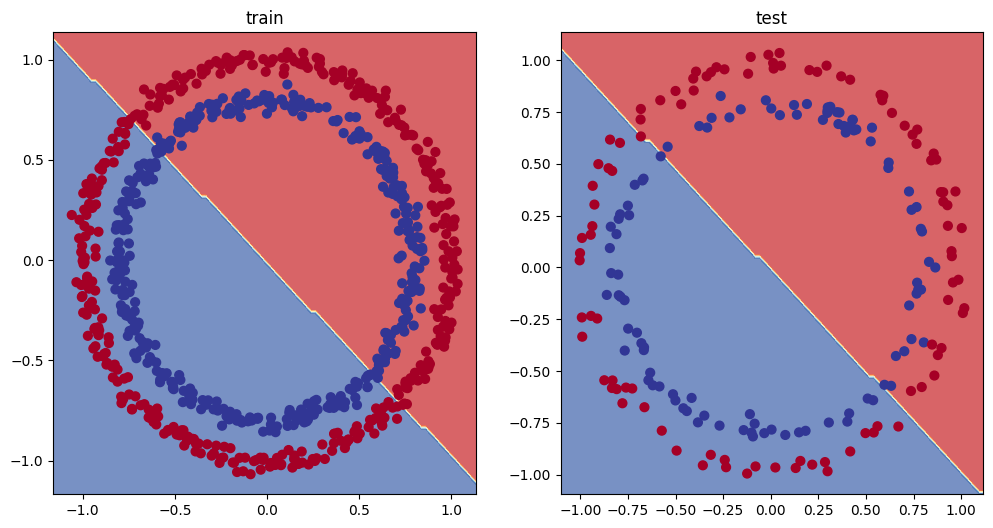

In [34]:
import numpy as np
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

In [35]:
## improving model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x))) ## speedup operations using this way

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [36]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5755,  0.7041],
                      [-0.0320, -0.6590],
                      [-0.1165, -0.3592],
                      [ 0.5921, -0.0829],
                      [-0.6749,  0.2643],
                      [ 0.3522, -0.3204],
                      [ 0.2684,  0.2083],
                      [-0.0060, -0.5936],
                      [ 0.2477, -0.6108],
                      [-0.0508,  0.0226]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.2522,  0.2442,  0.4720,  0.5226, -0.0972,  0.1145,  0.5388, -0.5485,
                      -0.0808, -0.4698], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1544,  0.0948, -0.0483,  0.1375,  0.0776, -0.2656,  0.1490,  0.1688,
                        0.2521, -0.0645],
                      [ 0.0841, -0.3067,  0.0512,  0.1541,  0.0236,  0.1995, -0.0817,  0.1720,
                        0.1446, -0.2043],
                      [-0.2960, -0.169

In [37]:
## loss function

loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [38]:
##training

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

##training

for epoch in range(epochs):
  model_1.train()

  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## testing

  model_1.eval()
  with torch.inference_mode():
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch%10==0:
    print(f" epoch: {epoch} | loss: {loss:.5f} | Acc : {acc:.2f}% | test_loss : {test_loss:.5f} | test_acc : {test_acc:.2f}%")

 epoch: 0 | loss: 0.69603 | Acc : 57.38% | test_loss : 0.69969 | test_acc : 57.00%
 epoch: 10 | loss: 0.69385 | Acc : 53.75% | test_loss : 0.69717 | test_acc : 46.00%
 epoch: 20 | loss: 0.69334 | Acc : 51.75% | test_loss : 0.69635 | test_acc : 47.00%
 epoch: 30 | loss: 0.69319 | Acc : 51.12% | test_loss : 0.69599 | test_acc : 47.00%
 epoch: 40 | loss: 0.69314 | Acc : 50.38% | test_loss : 0.69577 | test_acc : 47.50%
 epoch: 50 | loss: 0.69311 | Acc : 50.38% | test_loss : 0.69561 | test_acc : 47.50%
 epoch: 60 | loss: 0.69309 | Acc : 50.50% | test_loss : 0.69549 | test_acc : 47.00%
 epoch: 70 | loss: 0.69307 | Acc : 50.50% | test_loss : 0.69539 | test_acc : 47.50%
 epoch: 80 | loss: 0.69305 | Acc : 50.62% | test_loss : 0.69531 | test_acc : 47.50%
 epoch: 90 | loss: 0.69304 | Acc : 50.75% | test_loss : 0.69524 | test_acc : 47.00%
 epoch: 100 | loss: 0.69303 | Acc : 50.62% | test_loss : 0.69517 | test_acc : 47.00%
 epoch: 110 | loss: 0.69302 | Acc : 50.88% | test_loss : 0.69512 | test_acc 

In [39]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5848,  0.7046],
                      [-0.0322, -0.6590],
                      [-0.1026, -0.3582],
                      [ 0.5781, -0.0839],
                      [-0.6719,  0.2646],
                      [ 0.3555, -0.3202],
                      [ 0.2623,  0.2078],
                      [ 0.0035, -0.5930],
                      [ 0.2498, -0.6107],
                      [-0.0502,  0.0227]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.2544,  0.2447,  0.4766,  0.5170, -0.0955,  0.1149,  0.5363, -0.5455,
                      -0.0801, -0.4693], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1604,  0.0947, -0.0483,  0.1437,  0.0718, -0.2624,  0.1527,  0.1672,
                        0.2537, -0.0661],
                      [ 0.1033, -0.3068,  0.0514,  0.1742,  0.0049,  0.2095, -0.0696,  0.1663,
                        0.1496, -0.2095],
                      [-0.3055, -0.169

In [40]:
next(model_1.parameters()).device

device(type='cuda', index=0)

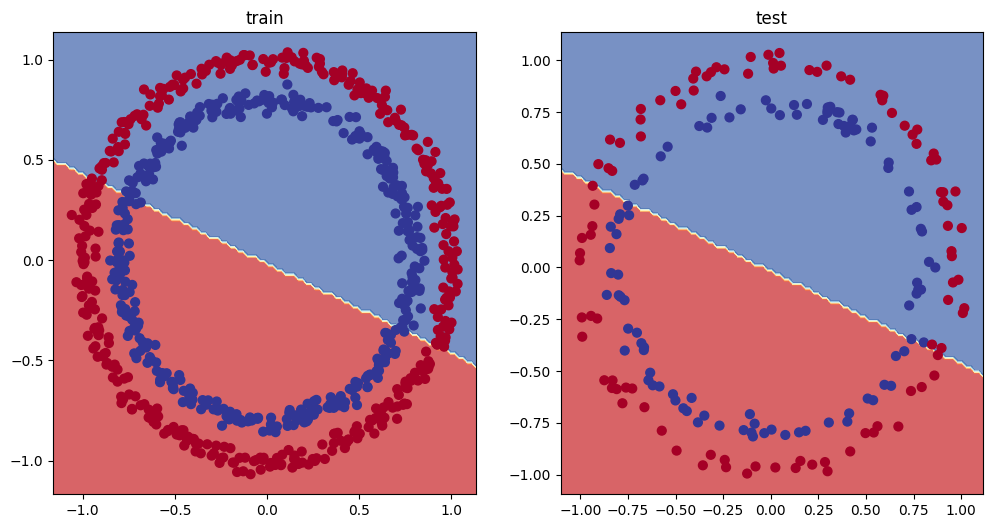

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

## recreating non linear data

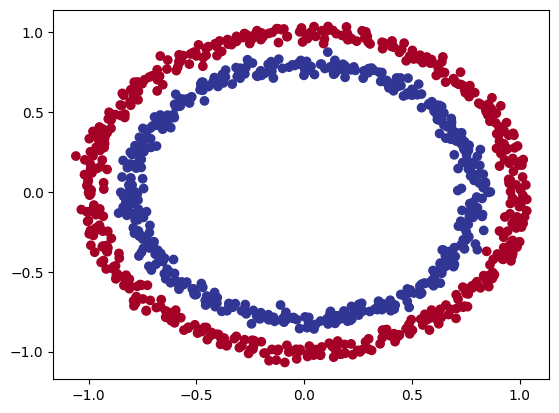

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [43]:
## converting data to tensor and train test split
import torch
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [44]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [45]:
## building model with non linearity

from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [46]:
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [47]:
## training model
torch.manual_seed(42)
torch.cuda.manual_seed(42)


X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

epochs=1000

for epoch in range(epochs):
  model_3.train()
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))


  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
## testing
  model_3.eval()

  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%10==0:
    print(f" epoch: {epoch} | loss: {loss:.5f} | Acc : {acc:.2f}% | test_loss : {test_loss:.5f} | test_acc : {test_acc:.2f}%")



 epoch: 0 | loss: 0.69295 | Acc : 50.00% | test_loss : 0.69319 | test_acc : 50.00%
 epoch: 10 | loss: 0.69248 | Acc : 50.50% | test_loss : 0.69260 | test_acc : 50.00%
 epoch: 20 | loss: 0.69225 | Acc : 59.13% | test_loss : 0.69231 | test_acc : 56.50%
 epoch: 30 | loss: 0.69209 | Acc : 70.25% | test_loss : 0.69212 | test_acc : 68.00%
 epoch: 40 | loss: 0.69195 | Acc : 68.38% | test_loss : 0.69195 | test_acc : 71.00%
 epoch: 50 | loss: 0.69181 | Acc : 58.25% | test_loss : 0.69177 | test_acc : 58.00%
 epoch: 60 | loss: 0.69168 | Acc : 54.00% | test_loss : 0.69161 | test_acc : 54.50%
 epoch: 70 | loss: 0.69155 | Acc : 53.12% | test_loss : 0.69146 | test_acc : 53.00%
 epoch: 80 | loss: 0.69141 | Acc : 52.62% | test_loss : 0.69132 | test_acc : 53.00%
 epoch: 90 | loss: 0.69128 | Acc : 52.75% | test_loss : 0.69117 | test_acc : 53.00%
 epoch: 100 | loss: 0.69115 | Acc : 52.88% | test_loss : 0.69102 | test_acc : 52.50%
 epoch: 110 | loss: 0.69103 | Acc : 52.88% | test_loss : 0.69088 | test_acc 

In [48]:
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test.to(device)))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [49]:
next(model_3.parameters()).device

device(type='cuda', index=0)

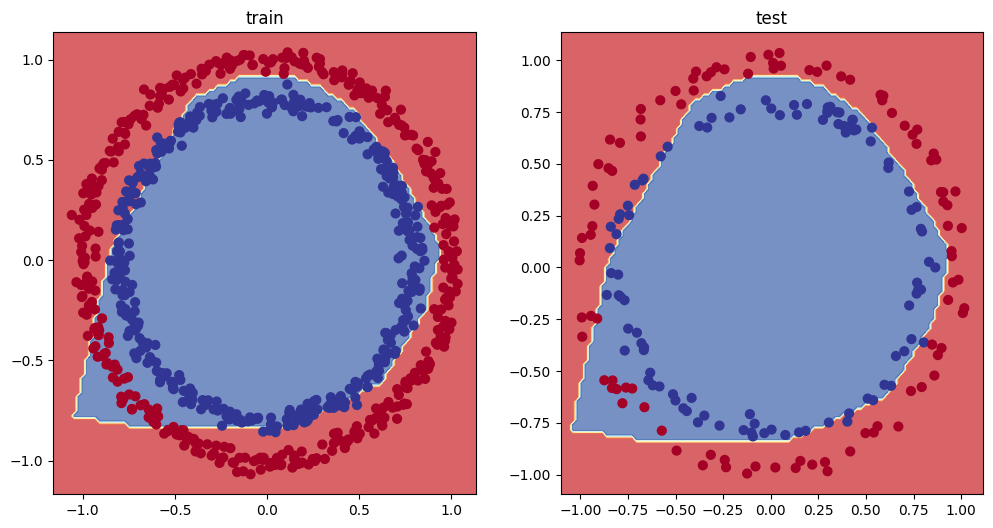

In [50]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

## Replicating non linear activation functions

In [51]:
A=torch.arange(-10,10,1).type(torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

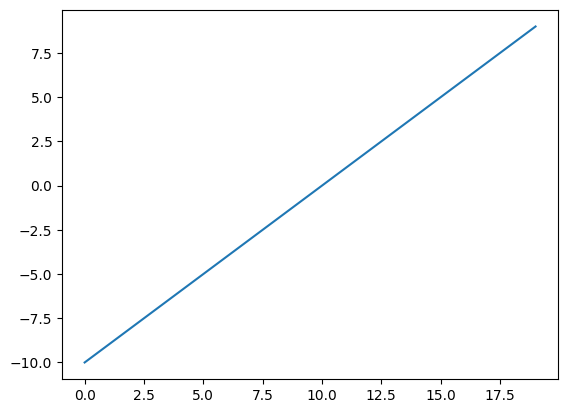

In [52]:
plt.plot(A)

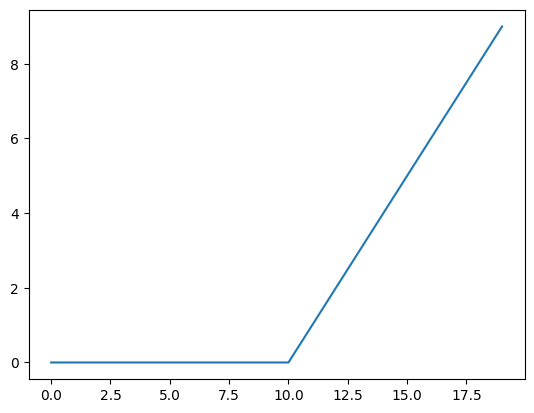

In [53]:
plt.plot(torch.relu(A))

In [54]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

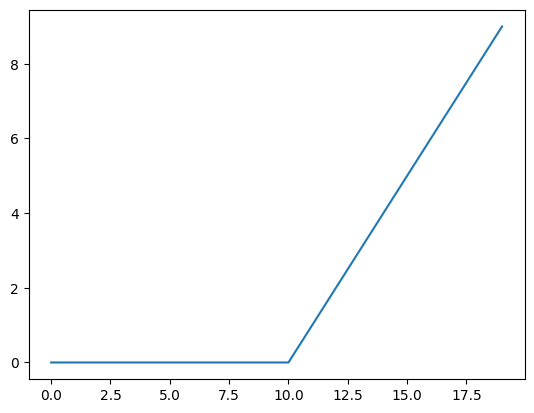

In [55]:
plt.plot(relu(A))

In [56]:
def sigmoid(x):
  return(1/(1+torch.exp(-x)))

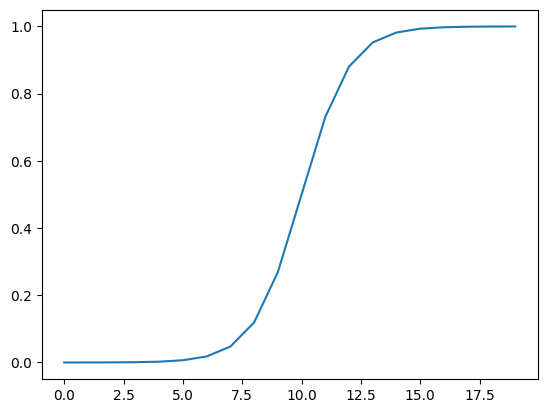

In [57]:
plt.plot(torch.sigmoid(A));

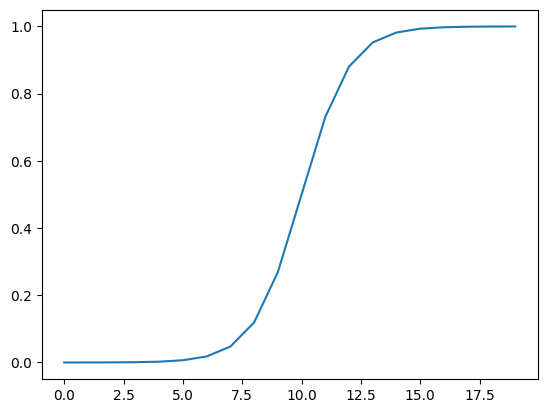

In [58]:
plt.plot(sigmoid(A));

## creating a toy data for multi class classification

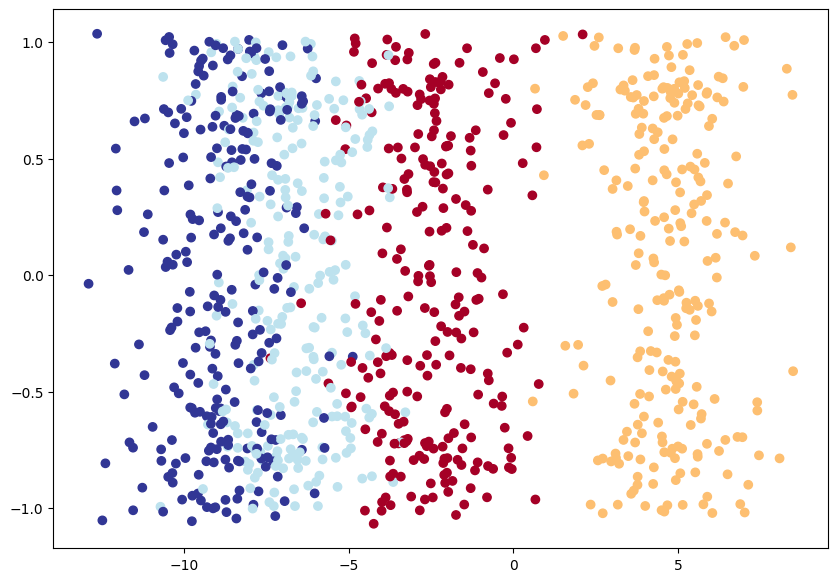

In [59]:
## dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## HYPERPARAMETERS

NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

  ## Creating multi class data

X_blob, y_blob=make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5 , ## little shake up to clusters
                          random_state=RANDOM_SEED)


## turn data to tensor

X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.float)


## split into train test

X_blob_train, X_blob_test, y_blob_train, y_blob_test=train_test_split(X_blob,
                                                                      y_blob,
                                                                      test_size=0.2,
                                                                      random_state=RANDOM_SEED)


plt.figure(figsize=(10,7))

plt.scatter(X_blob[:,0],X[:,1],c=y_blob,cmap=plt.cm.RdYlBu);

In [72]:
### building model for multi class classification
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """
    Args:
    input_features :which is int datatype and number of input features
    output_features : which is int and number of output featuees(number of classes)
    hidden units: which is int and number of hidden units between layes

    Returns:

    """
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)


model_4=BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [73]:
next(model_4.parameters()).device

device(type='cuda', index=0)

In [74]:
## loss function and optimizer

loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_4.parameters(),lr=0.1)

In [76]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[ 0.7111, -0.5330,  0.3307, -0.2327],
        [-0.3420, -1.7850, -0.3224, -1.1384],
        [ 0.1878, -0.8563,  0.3375, -0.9026],
        [ 0.4513, -0.4277,  0.2498, -0.1940],
        [ 0.8922, -0.9492,  0.3245, -0.5287],
        [-0.4885, -2.0119, -0.4004, -1.3252],
        [ 0.2586, -0.8477,  0.2739, -0.8695],
        [ 0.6816, -1.1144,  0.2053, -0.6434],
        [ 0.3433, -1.0156,  0.4706, -1.1226],
        [ 0.7687, -1.0243,  0.2629, -0.5887]], device='cuda:0')

In [79]:
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:5]

tensor([[0.4236, 0.1221, 0.2895, 0.1648],
        [0.3694, 0.0873, 0.3767, 0.1666],
        [0.3509, 0.1235, 0.4076, 0.1179],
        [0.3627, 0.1506, 0.2965, 0.1902],
        [0.5084, 0.0806, 0.2882, 0.1228]], device='cuda:0')

In [80]:
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0')

In [84]:
y_preds=torch.argmax(y_pred_probs,dim=1)

y_preds

tensor([0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2,
        2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
        2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
        0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
        2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
        2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
        2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0,
        0, 2, 2, 0, 2, 0, 2, 0], device='cuda:0')